In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# Welcome to MapMaker
# 1. Type the name of the excel file of interest into the quotation marks for file_path.
file_path = "hipparcosSky.xlsx"

# 2. Type the letter corresponding to the series these projections are from (H, R, or S)
Series = "H"

In [3]:
# Create the file
File_Name = f"{Series}_Series_Star_Projections"
path = f'./{File_Name}'
os.makedirs(path, exist_ok=True)

try:
    # Print the entire sheet
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    
    df = pd.read_excel(file_path)
    print(df)

except FileNotFoundError:
    print(f"File '{file_path}' not found.")
except Exception as e:
    print(f"An error occurred: {str(e)}")

    Star Name Right Ascension (HH.MM.SS)  Declination (DD.SS)  \
0     H000677                   00.08.23                29.09   
1     H000746                   00.09.10                59.15   
2     H000765                   00.09.25               -45.75   
3     H001067                   00.13.14                15.18   
4     H001562                   00.19.26                -8.82   
5     H002021                   00.25.39               -77.26   
6     H002072                   00.26.12               -43.68   
7     H002081                   00.26.17               -42.31   
8     H002920                   00.36.58                53.90   
9     H003092                   00.39.20                30.86   
10    H003179                   00.40.30                56.54   
11    H003419                   00.43.35               -17.99   
12    H003821                   00.49.05                57.82   
13    H004427                   00.56.43                60.72   
14    H004436            

In [4]:
# Convert HH.MM.SS to degrees

# Convert individual columns to strings
columns_to_convert = ['Right Ascension (HH.MM.SS)', 'Declination (DD.SS)']
df[columns_to_convert] = df[columns_to_convert].astype(str)

def convert_coordinates(coord):
    parts = coord.split('.')
    if len(parts) == 3:
        first_part = float(parts[0]) * 15
        second_part = (float(parts[1]) /60)*15
        third_part = (float(parts[2]) /3600)*15
        return first_part + second_part + third_part
    elif len(parts) == 2:
        first_part = float(parts[0])
        second_part = (float(parts[1]) / 3600)*15
        return first_part 
    else:
        return "Invalid coordinates format"

# Apply the convert_coordinates function to the DataFrame columns
df[['Right Ascension (HH.MM.SS)','Declination (DD.SS)']] = df[['Right Ascension (HH.MM.SS)','Declination (DD.SS)']].applymap(convert_coordinates)

print(df)

    Star Name  Right Ascension (HH.MM.SS)  Declination (DD.SS)  \
0     H000677                    2.095833                 29.0   
1     H000746                    2.291667                 59.0   
2     H000765                    2.354167                -45.0   
3     H001067                    3.308333                 15.0   
4     H001562                    4.858333                 -8.0   
5     H002021                    6.412500                -77.0   
6     H002072                    6.550000                -43.0   
7     H002081                    6.570833                -42.0   
8     H002920                    9.241667                 53.0   
9     H003092                    9.833333                 30.0   
10    H003179                   10.125000                 56.0   
11    H003419                   10.895833                -17.0   
12    H003821                   12.270833                 57.0   
13    H004427                   14.179167                 60.0   
14    H004

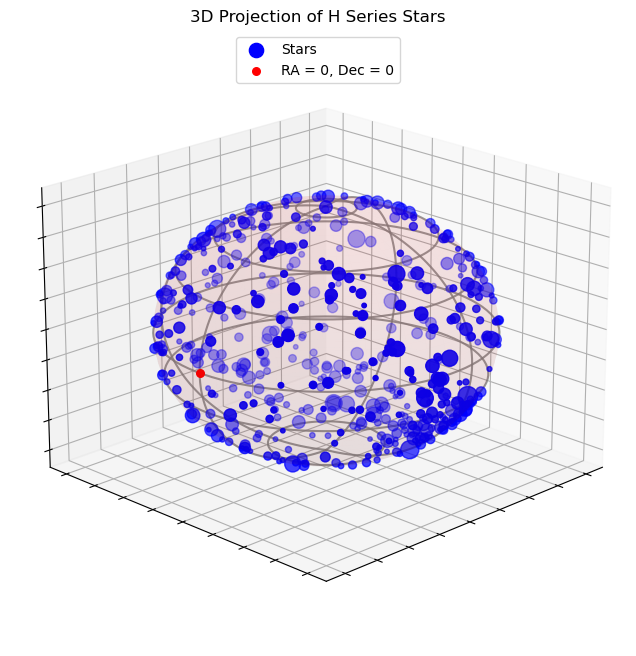

In [5]:
# MapMaker 1: A 3D projection of stars onto the celestial sphere.

df = pd.DataFrame(df)

#PLOTTING SECTION 1: data imports and alterations
#ra_columns = [col for col in df.columns if col.startswith('R')]
#dec_columns = [col for col in df.columns if col.startswith('D')]
#mag_columns = [col for col in df.columns if col.startswith('M')]

ra_rad = np.radians(df['Right Ascension (HH.MM.SS)']) 
dec_rad = np.radians(df['Declination (DD.SS)'])

# Convert spherical coordinates to Cartesian coordinates (this is just for the python plotting)
x = np.cos(ra_rad) * np.cos(dec_rad)
y = np.sin(ra_rad) * np.cos(dec_rad)
z = np.sin(dec_rad)

#MAGNITUDE/SIZE RELATION SECTION
# Normalize magnitudes to determine the size of the stars
sizes = (df['Magnitude (V, Visual)'] - df['Magnitude (V, Visual)'].min()) / (df['Magnitude (V, Visual)'].max() - df['Magnitude (V, Visual)'].min())
# Define the size scale for the stars
min_size = 200
max_size = 10
# Calculate the size of each star based on its magnitude
star_sizes = min_size + (max_size - min_size) * sizes

#PLOTTING SECTION 2: formatting and additions to the figure
# Plotting on a sphere in Cartesian coordinates
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each point in Cartesian coordinates with size based on magnitude
ax.scatter(x, y, z, color='blue', s=star_sizes, label='Stars')

# Plot the translucent sphere with radius 1 and center at the origin
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x_sphere = np.outer(np.cos(u), np.sin(v))
y_sphere = np.outer(np.sin(u), np.sin(v))
z_sphere = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x_sphere, y_sphere, z_sphere, color='r', alpha=0.05)

# Plot lines of longitude (meridians)
for ra in np.arange(0, 360, 100):
    ra_rad = np.radians(ra)
    x_line = np.cos(ra_rad) * np.sin(v)
    y_line = np.sin(ra_rad) * np.sin(v)
    z_line = np.cos(v)
    ax.plot(x_line, y_line, z_line, color='gray', alpha=0.8)

# Plot lines of latitude (parallels)
for dec in np.arange(-90, 180, 50):
    dec_rad = np.radians(dec)
    x_line = np.cos(u) * np.sin(dec_rad)
    y_line = np.sin(u) * np.sin(dec_rad)
    z_line = np.cos(dec_rad) * np.ones_like(u)
    ax.plot(x_line, y_line, z_line, color='gray', alpha=0.8)

# Plot the red point at RA = 0 and Dec = 0
ax.scatter(1, 0, 0, color='red', s=30, label='RA = 0, Dec = 0')

# Set title
ax.set_title(f'3D Projection of {Series} Series Stars')

# Adjusting the viewing angle
ax.view_init(elev=20, azim=45)  # Set the elevation and azimuth angles

# Remove axis labels
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

# Add legend
ax.legend(loc='upper center')

# Save the figure into desired folder
plt.savefig(f"{path}/3Dprojection.png")

plt.show()

In [6]:
#MapMaker 2a: Dataframe Separation

positive_df = df[df['Declination (DD.SS)'] >= 0]
negative_df = df[df['Declination (DD.SS)'] < 0]

print("Positive Dec DataFrame:")
print(positive_df)

print("\nNegative Dec DataFrame:")
print(negative_df)

Positive Dec DataFrame:
    Star Name  Right Ascension (HH.MM.SS)  Declination (DD.SS)  \
0     H000677                    2.095833                 29.0   
1     H000746                    2.291667                 59.0   
3     H001067                    3.308333                 15.0   
8     H002920                    9.241667                 53.0   
9     H003092                    9.833333                 30.0   
10    H003179                   10.125000                 56.0   
12    H003821                   12.270833                 57.0   
13    H004427                   14.179167                 60.0   
14    H004436                   14.187500                 38.0   
18    H005447                   17.433333                 35.0   
20    H006686                   21.454167                 60.0   
23    H007097                   22.870833                 15.0   
25    H007607                   24.500000                 48.0   
28    H008796                   28.270833           

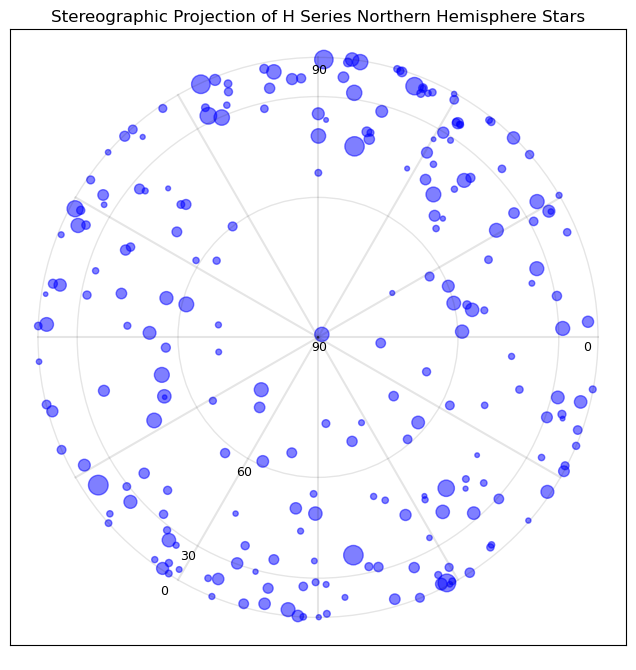

In [7]:
# MapMaker 2b: Stereographic projection for NORTHERN hemisphere

# Convert RA and Dec to radians, then to Cartesian coordinates
ra_rad = np.radians(positive_df['Right Ascension (HH.MM.SS)'])
dec_rad = np.radians(positive_df['Declination (DD.SS)'])

x = np.cos(ra_rad) * np.cos(dec_rad)
y = np.sin(ra_rad) * np.cos(dec_rad)

# Define the stereographic projection
center_dec = np.radians(90)  # Center of the circle
edge_dec = np.radians(0)      # Edge of the circle

def stereographic_projection(x, y, center_dec, edge_dec):
    x_proj = x / (1 - np.sin(center_dec) * np.sin(edge_dec))
    y_proj = y / (1 - np.sin(center_dec) * np.sin(edge_dec))
    return x_proj, y_proj

x_proj, y_proj = stereographic_projection(x, y, center_dec, edge_dec)

# Plot the stereographic projection with variable point sizes based on magnitude
# Extracting magnitudes and normalizing them
magnitudes = positive_df['Magnitude (V, Visual)']
min_mag = magnitudes.min()
max_mag = magnitudes.max()
normalized_magnitudes = (magnitudes - min_mag) / (max_mag - min_mag)

# Size range for points
min_size = 10
max_size = 200
point_sizes = min_size + (max_size - min_size) * (1 - normalized_magnitudes)

# Add labels
# Create a subplot within a larger figure
fig, ax = plt.subplots(figsize=(8, 8))
# Dec = 0
ax.annotate('0',
            xy=(115, 55), xycoords='figure points',
            fontsize=9)
# Dec = 30
ax.annotate('30',
            xy=(130, 80), xycoords='figure points',
            fontsize=9)
# Dec = 60
ax.annotate('60',
            xy=(170, 140), xycoords='figure points',
            fontsize=9)
# Dec = 90
ax.annotate('90',
            xy=(224, 230), xycoords='figure points',
            fontsize=9)
# RA = 0
ax.annotate('0',
            xy=(420, 230), xycoords='figure points',
            fontsize=9)
# RA = 90
ax.annotate('90',
            xy=(224, 430), xycoords='figure points',
            fontsize=9)

# Plot the stereographic projection on the subplot
ax.scatter(x_proj, y_proj, s=point_sizes, color='blue', alpha=0.5)

# Add RA markers
angles = np.linspace(0, 2 * np.pi, 13)[:-1]
for angle in angles:
    dx = np.cos(angle)
    dy = np.sin(angle)
    ax.plot([0, dx], [0, dy], color='black', alpha=0.1)

# Add Dec markers
circles = [((0, 0), 1),     # Dec = 90
           ((0, 0), 0.86),  # Dec = 30
           ((0, 0), 0.5)]   # Dec = 60

for (center, radius) in circles:
    circle = plt.Circle(center, radius, color='black', fill=False, alpha=0.1)
    ax.add_artist(circle)
    
# Manually plot a point with RA = 0 and Dec = 45 (REMOVE LATER. ONLY HERE FOR TESTING PURPOSES)
ra_rad_point = np.radians(90)  # Convert RA to radians
dec_rad_point = np.radians(75)  # Convert Dec to radians
x_point = np.cos(ra_rad_point) * np.cos(dec_rad_point)
y_point = np.sin(ra_rad_point) * np.cos(dec_rad_point)
x_proj_point, y_proj_point = stereographic_projection(x_point, y_point, center_dec, edge_dec)
#ax.scatter(x_proj_point, y_proj_point, s=100, color='red', marker='+')

ax.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
ax.set_title(f'Stereographic Projection of {Series} Series Northern Hemisphere Stars')
ax.set_aspect('equal', adjustable='box')

# Save the figure into desired folder
plt.savefig(f"{path}/StereographicNorthern.png")

# Display the figure with subplot
plt.show()

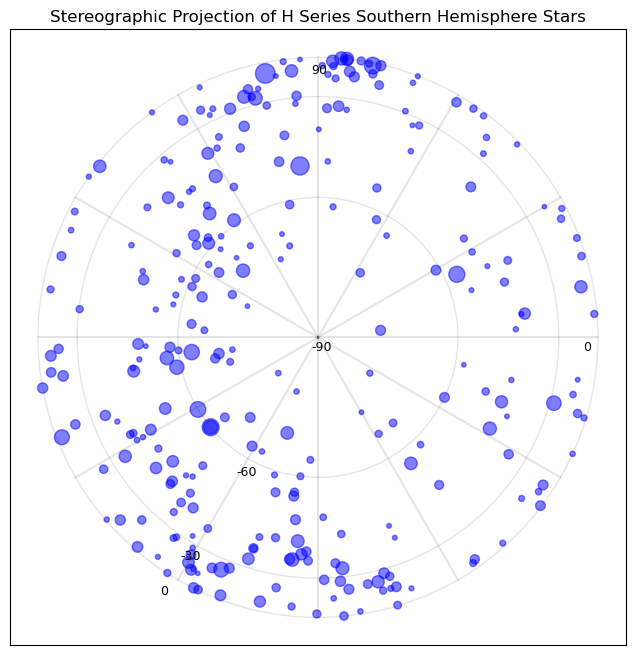

In [8]:
# MapMaker 2c: Stereographic projection for SOUTHERN hemisphere

# Convert RA and Dec to radians, then to Cartesian coordinates
ra_rad = np.radians(negative_df['Right Ascension (HH.MM.SS)'])
dec_rad = np.radians(negative_df['Declination (DD.SS)'])

x = np.cos(ra_rad) * np.cos(dec_rad)
y = np.sin(ra_rad) * np.cos(dec_rad)

# Define the stereographic projection
center_dec = np.radians(-90)  # Center of the circle
edge_dec = np.radians(0)      # Edge of the circle

def stereographic_projection(x, y, center_dec, edge_dec):
    x_proj = x / (1 - np.sin(center_dec) * np.sin(edge_dec))
    y_proj = y / (1 - np.sin(center_dec) * np.sin(edge_dec))
    return x_proj, y_proj

x_proj, y_proj = stereographic_projection(x, y, center_dec, edge_dec)

# Plot the stereographic projection with variable point sizes based on magnitude
# Extracting magnitudes and normalizing them
magnitudes = negative_df['Magnitude (V, Visual)']
min_mag = magnitudes.min()
max_mag = magnitudes.max()
normalized_magnitudes = (magnitudes - min_mag) / (max_mag - min_mag)

# Size range for points
min_size = 10
max_size = 200
point_sizes = min_size + (max_size - min_size) * (1 - normalized_magnitudes)

# Add labels
# Create a subplot within a larger figure
fig, ax = plt.subplots(figsize=(8, 8))
# Dec = 0
ax.annotate('0',
            xy=(115, 55), xycoords='figure points',
            fontsize=9)
# Dec = 30
ax.annotate('-30',
            xy=(130, 80), xycoords='figure points',
            fontsize=9)
# Dec = 60
ax.annotate('-60',
            xy=(170, 140), xycoords='figure points',
            fontsize=9)
# Dec = 90
ax.annotate('-90',
            xy=(224, 230), xycoords='figure points',
            fontsize=9)
# RA = 0
ax.annotate('0',
            xy=(420, 230), xycoords='figure points',
            fontsize=9)
# RA = 90
ax.annotate('90',
            xy=(224, 430), xycoords='figure points',
            fontsize=9)

# Plot the stereographic projection on the subplot
ax.scatter(x_proj, y_proj, s=point_sizes, color='blue', alpha=0.5)

# Add RA markers
angles = np.linspace(0, 2 * np.pi, 13)[:-1]
for angle in angles:
    dx = np.cos(angle)
    dy = np.sin(angle)
    ax.plot([0, dx], [0, dy], color='black', alpha=0.1)

# Add Dec markers
circles = [((0, 0), 1),     # Dec = 90
           ((0, 0), 0.86),  # Dec = 30
           ((0, 0), 0.5)]   # Dec = 60

for (center, radius) in circles:
    circle = plt.Circle(center, radius, color='black', fill=False, alpha=0.1)
    ax.add_artist(circle)
    
# Manually plot a point with RA = 0 and Dec = 45 (REMOVE LATER. ONLY HERE FOR TESTING PURPOSES)
ra_rad_point = np.radians(90)  # Convert RA to radians
dec_rad_point = np.radians(75)  # Convert Dec to radians
x_point = np.cos(ra_rad_point) * np.cos(dec_rad_point)
y_point = np.sin(ra_rad_point) * np.cos(dec_rad_point)
x_proj_point, y_proj_point = stereographic_projection(x_point, y_point, center_dec, edge_dec)
#ax.scatter(x_proj_point, y_proj_point, s=100, color='red', marker='+')

ax.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
ax.set_title(f'Stereographic Projection of {Series} Series Southern Hemisphere Stars')
ax.set_aspect('equal', adjustable='box')

# Save the figure into desired folder
plt.savefig(f"{path}/StereographicSouthern.png")

# Display the figure with subplot
plt.show()